# COVID19 in Brazil

Help me, Obi-Wan Kenobi. You're my only hope. What's this? What is what?!? He asked you a question... What is that? Help me, Obi-Wan Kenobi. You're my only hope. Help me, Obi-Wan Kenobi. You're my only hope. Oh, he says it's nothing, sir. Merely a malfunction. Old data. Pay it no mind. Who is she? She's beautiful. I'm afraid I'm not quite sure, sir. Help me, Obi-Wan Kenobi... I think she was a passenger on our last voyage. A person of some importance, sir -- I believe. Our captain was attached to... Is there more to this recording? Behave yourself, Artoo. You're going to get us in trouble. It's all right, you can trust him. He's our new master.

## Identify target locations

Before we start our KDD process we need to identify which locations we are going to target to reduce the amount of data (especially, COVID-19 notifications).

In [145]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [146]:
# https://www.kaggle.com/crisparada/brazilian-cities
df = pd.read_csv('../datasets/BRAZIL_CITIES.csv', delimiter=';')

In [147]:
df

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,...,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
1,Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,...,NaN,NaN,NaN,2227.0,1142.0,0.0,NaN,NaN,NaN,1.0
2,Abadiânia,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,...,1.0,33724584.0,67091904.0,2838.0,1426.0,0.0,NaN,NaN,NaN,3.0
3,Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,...,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,NaN,NaN,NaN,4.0
4,Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,...,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5568,Xique-Xique,BA,0,45536.0,45536.0,0.0,11637.0,8461.0,3176.0,32497.0,...,3.0,51944373.0,276223306.0,2125.0,5064.0,0.0,NaN,NaN,NaN,2.0
5569,Zabelê,PB,0,2075.0,2075.0,0.0,673.0,489.0,184.0,1469.0,...,NaN,NaN,NaN,87.0,162.0,0.0,NaN,NaN,NaN,NaN
5570,Zacarias,SP,0,2335.0,2335.0,0.0,799.0,638.0,161.0,1836.0,...,NaN,NaN,NaN,901.0,346.0,0.0,NaN,NaN,NaN,1.0
5571,Zé Doca,MA,0,50173.0,50152.0,21.0,11886.0,7611.0,4275.0,30803.0,...,3.0,34835818.0,531526331.0,1725.0,11087.0,0.0,NaN,NaN,NaN,1.0


In [148]:
columns = ['CITY', 'STATE', 'IBGE_DU', 'IBGE_POP', 'AREA', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade', 'IDHM_Educacao']
df = df[columns].copy()
df

,CITY,STATE,IBGE_DU,IBGE_POP,AREA,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao
0,Abadia De Goiás,GO,2137.0,5300.0,147.26,0.708,0.687,0.830,0.622
1,Abadia Dos Dourados,MG,2328.0,4154.0,881.06,0.690,0.693,0.839,0.563
2,Abadiânia,GO,4655.0,10656.0,"1,045.13",0.690,0.671,0.841,0.579
3,Abaeté,MG,7694.0,18464.0,"1,817.07",0.698,0.720,0.848,0.556
4,Abaetetuba,PA,31061.0,82956.0,"1,610.65",0.628,0.579,0.798,0.537
...,...,...,...,...,...,...,...,...,...
5568,Xique-Xique,BA,11637.0,32497.0,"5,079.66",0.585,0.563,0.741,0.479
5569,Zabelê,PB,673.0,1469.0,109.39,0.623,0.567,0.725,0.587
5570,Zacarias,SP,799.0,1836.0,319.06,0.730,0.695,0.826,0.674
5571,Zé Doca,MA,11886.0,30803.0,"2,140.11",0.595,0.559,0.745,0.505


In [149]:
df['AREA'] = pd.to_numeric(df['AREA'].str.replace(',', ''), errors='coerce')
df

,CITY,STATE,IBGE_DU,IBGE_POP,AREA,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao
0,Abadia De Goiás,GO,2137.0,5300.0,147.26,0.708,0.687,0.830,0.622
1,Abadia Dos Dourados,MG,2328.0,4154.0,881.06,0.690,0.693,0.839,0.563
2,Abadiânia,GO,4655.0,10656.0,1045.13,0.690,0.671,0.841,0.579
3,Abaeté,MG,7694.0,18464.0,1817.07,0.698,0.720,0.848,0.556
4,Abaetetuba,PA,31061.0,82956.0,1610.65,0.628,0.579,0.798,0.537
...,...,...,...,...,...,...,...,...,...
5568,Xique-Xique,BA,11637.0,32497.0,5079.66,0.585,0.563,0.741,0.479
5569,Zabelê,PB,673.0,1469.0,109.39,0.623,0.567,0.725,0.587
5570,Zacarias,SP,799.0,1836.0,319.06,0.730,0.695,0.826,0.674
5571,Zé Doca,MA,11886.0,30803.0,2140.11,0.595,0.559,0.745,0.505


In [150]:
df = df.copy()
df[df['CITY'] == 'Natal']

,CITY,STATE,IBGE_DU,IBGE_POP,AREA,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao
3240,Natal,RN,235720.0,790062.0,167.4,0.763,0.768,0.835,0.694


In [151]:
df = df.dropna().copy()
df

,CITY,STATE,IBGE_DU,IBGE_POP,AREA,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao
0,Abadia De Goiás,GO,2137.0,5300.0,147.26,0.708,0.687,0.830,0.622
1,Abadia Dos Dourados,MG,2328.0,4154.0,881.06,0.690,0.693,0.839,0.563
2,Abadiânia,GO,4655.0,10656.0,1045.13,0.690,0.671,0.841,0.579
3,Abaeté,MG,7694.0,18464.0,1817.07,0.698,0.720,0.848,0.556
4,Abaetetuba,PA,31061.0,82956.0,1610.65,0.628,0.579,0.798,0.537
...,...,...,...,...,...,...,...,...,...
5568,Xique-Xique,BA,11637.0,32497.0,5079.66,0.585,0.563,0.741,0.479
5569,Zabelê,PB,673.0,1469.0,109.39,0.623,0.567,0.725,0.587
5570,Zacarias,SP,799.0,1836.0,319.06,0.730,0.695,0.826,0.674
5571,Zé Doca,MA,11886.0,30803.0,2140.11,0.595,0.559,0.745,0.505


In [152]:
X = df[['IBGE_DU', 'IBGE_POP', 'AREA', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade', 'IDHM_Educacao']].to_numpy()
X

array([[2.13700e+03, 5.30000e+03, 1.47260e+02, ..., 6.87000e-01,
        8.30000e-01, 6.22000e-01],
       [2.32800e+03, 4.15400e+03, 8.81060e+02, ..., 6.93000e-01,
        8.39000e-01, 5.63000e-01],
       [4.65500e+03, 1.06560e+04, 1.04513e+03, ..., 6.71000e-01,
        8.41000e-01, 5.79000e-01],
       ...,
       [7.99000e+02, 1.83600e+03, 3.19060e+02, ..., 6.95000e-01,
        8.26000e-01, 6.74000e-01],
       [1.18860e+04, 3.08030e+04, 2.14011e+03, ..., 5.59000e-01,
        7.45000e-01, 5.05000e-01],
       [1.02600e+03, 2.32600e+03, 1.90180e+02, ..., 7.52000e-01,
        8.85000e-01, 6.61000e-01]])

In [153]:
X_std = StandardScaler().fit_transform(X)
X_std

array([[-0.12609488, -0.1199572 , -0.24583912, ...,  0.54633268,
         0.63591875,  0.67351536],
       [-0.12314655, -0.12611827, -0.11390744, ...,  0.62077205,
         0.83744154,  0.04046626],
       [-0.08722627, -0.09116255, -0.0844089 , ...,  0.34782769,
         0.88222438,  0.21214059],
       ...,
       [-0.14674866, -0.13858018, -0.21495078, ...,  0.64558517,
         0.54635307,  1.23145693],
       [ 0.02439366,  0.0171507 ,  0.1124602 , ..., -1.0417072 ,
        -1.26735198, -0.58185319],
       [-0.14324462, -0.13594587, -0.23812243, ...,  1.35275918,
         1.86744687,  1.09197154]])

In [181]:
model = AgglomerativeClustering(distance_threshold=10, n_clusters=None).fit(X_std)
model.n_clusters_

37

In [182]:
df['CLUSTER'] = model.labels_
df

,CITY,STATE,IBGE_DU,IBGE_POP,AREA,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,CLUSTER
0,Abadia De Goiás,GO,2137.0,5300.0,147.26,0.708,0.687,0.830,0.622,1
1,Abadia Dos Dourados,MG,2328.0,4154.0,881.06,0.690,0.693,0.839,0.563,30
2,Abadiânia,GO,4655.0,10656.0,1045.13,0.690,0.671,0.841,0.579,30
3,Abaeté,MG,7694.0,18464.0,1817.07,0.698,0.720,0.848,0.556,30
4,Abaetetuba,PA,31061.0,82956.0,1610.65,0.628,0.579,0.798,0.537,20
...,...,...,...,...,...,...,...,...,...,...
5568,Xique-Xique,BA,11637.0,32497.0,5079.66,0.585,0.563,0.741,0.479,2
5569,Zabelê,PB,673.0,1469.0,109.39,0.623,0.567,0.725,0.587,2
5570,Zacarias,SP,799.0,1836.0,319.06,0.730,0.695,0.826,0.674,23
5571,Zé Doca,MA,11886.0,30803.0,2140.11,0.595,0.559,0.745,0.505,18


In [205]:
df[df['CITY'] == 'Natal']

,CITY,STATE,IBGE_DU,IBGE_POP,AREA,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,CLUSTER
3240,Natal,RN,235720.0,790062.0,167.4,0.763,0.768,0.835,0.694,27


In [206]:
df[df['CLUSTER'] == 27]

,CITY,STATE,IBGE_DU,IBGE_POP,AREA,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,CLUSTER
951,Campinas,SP,348424.0,1004839.0,794.57,0.805,0.829,0.860,0.731,27
971,Campo Grande,MS,250542.0,765394.0,8092.95,0.784,0.790,0.844,0.724,27
1637,Duque De Caxias,RJ,269538.0,820911.0,467.07,0.711,0.692,0.833,0.624,27
2036,Guarulhos,SP,360748.0,1036178.0,318.68,0.763,0.746,0.831,0.717,27
2840,Maceió,AL,274525.0,867156.0,509.32,0.721,0.739,0.799,0.635,27
3240,Natal,RN,235720.0,790062.0,167.40,0.763,0.768,0.835,0.694,27
3332,Nova Iguaçu,RJ,248283.0,784555.0,520.81,0.713,0.691,0.818,0.641,27
4670,São Gonçalo,RJ,326066.0,990001.0,248.16,0.740,0.711,0.833,0.681,27
4813,São Luís,MA,277201.0,942449.0,582.97,0.768,0.741,0.813,0.752,27
5212,Teresina,PI,222725.0,762444.0,1391.05,0.750,0.731,0.820,0.707,27


In [186]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

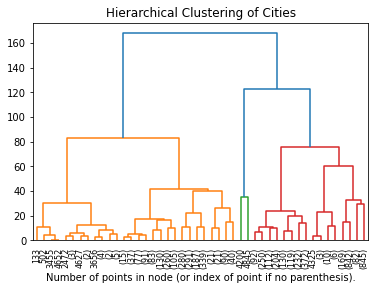

In [187]:
plt.title('Hierarchical Clustering of Cities')
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [195]:
# get largest clusters
db1_labels = model.labels_
labels, counts = np.unique(db1_labels[db1_labels>=0], return_counts=True)
labels[np.argsort(-counts)]

array([ 1, 20,  3, 30,  2,  7,  0, 32, 17,  8, 22, 18, 19, 16, 26, 23, 14,
       34,  5,  6, 10, 12,  9, 15, 24, 21, 36, 28,  4, 27, 11, 13, 29, 25,
       35, 31, 33])

In [207]:
df[df['CLUSTER'] == 1]

,CITY,STATE,IBGE_DU,IBGE_POP,AREA,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,CLUSTER
0,Abadia De Goiás,GO,2137.0,5300.0,147.26,0.708,0.687,0.830,0.622,1
31,Adelândia,GO,846.0,2190.0,115.35,0.700,0.664,0.836,0.622,1
32,Adolfo,SP,1200.0,3200.0,211.06,0.730,0.710,0.844,0.648,1
43,Agrolândia,SC,2952.0,5951.0,206.91,0.725,0.727,0.827,0.633,1
58,Água Limpa,GO,738.0,1422.0,452.86,0.722,0.691,0.821,0.663,1
...,...,...,...,...,...,...,...,...,...,...
5491,Vianópolis,GO,3991.0,8870.0,954.28,0.710,0.710,0.818,0.622,1
5494,Vicentina,MS,2018.0,4222.0,310.16,0.711,0.689,0.835,0.626,1
5501,Vidal Ramos,SC,1953.0,1769.0,346.93,0.700,0.728,0.802,0.588,1
5527,Virmond,PR,1224.0,1880.0,243.17,0.722,0.708,0.848,0.628,1


## Distributions by Locations